#### Τα απαραίτητα αντικείμενα για τους κώδικες

In [2]:
# Necessary Imports for the notebook
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, assemble, Aer
from qiskit.circuit import Gate
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
import numpy as np
from math import pi, sqrt, pow

## Circuits

In [3]:
def qubits_draw(qc):
    result = execute(qc, Aer.get_backend("statevector_simulator"), shots=1).result()
    display(plot_bloch_multivector(result.get_statevector(), reverse_bits=True))


In [4]:
def qsphere_draw(qc):
    result = execute(qc, Aer.get_backend("statevector_simulator"), shots=1).result()
    display(plot_state_qsphere(result.get_statevector()))


In [5]:
def histogram_draw(qc):
    sim = Aer.get_backend('statevector_simulator')
    qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
    counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector

    display(plot_histogram(counts))  # Display the output on measurement of state vector

In [6]:
def Oracle(n=2, x0=3):
    U = np.identity(2**n)
    U[x0][x0] = -1

    qc = QuantumCircuit(n)
    qc.unitary(U, range(n))
    return qc.to_gate(label="Oracle")


In [7]:
def Diffusion(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [8]:

def Grover_circuit(nqubits=4, x0=0, qspheres=True, qubits=True, histograms=True, circuit=True):
    """nqubits: The number of qubits {4} \n x0: The secret value (less than 2^n-1) {15}
    """
    # Documentation https://qiskit.org/textbook/ch-algorithms/grover.html

    N = pow(2, nqubits) # possible states (2 ^ num of qubits)

    ## -------------------------------------------- Initialize circuit
    qc = QuantumCircuit(nqubits)
    qc.h(qc.qubits)

    disp_qc = qc.copy()

    ## -------------------------------------------- Useless
    # Aer.get_backend('statevector_simulator')
    # qc.initialize([0,1],0) # set q0 to |1>


    reps = round(pi/4*sqrt(N) - .5) # floor(pi * sqrt(N/2))
    print("Number of Repetitions =", reps)

    for rep in range(reps):
        disp_qc.barrier()
        disp_qc.append(Oracle(disp_qc.num_qubits, x0), disp_qc.qubits)
        disp_qc.append(Diffusion(disp_qc.num_qubits), disp_qc.qubits)

        ## -------------------------------------------- Grover's Oracle
        U = np.identity(2**nqubits)
        U[x0][x0] = -1
        qc.unitary(U, range(nqubits))

        ## -------------------------------------------- Difusion Gate
        # Apply transformation |s> -> |00..0> (H-gates)
        qc.h(qc.qubits)
        # Apply transformation |00..0> -> |11..1> (X-gates)
        qc.x(qc.qubits)
        # Do multi-controlled-Z gate
        qc.h(nqubits-1)
        qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
        qc.h(nqubits-1)
        # Apply transformation |11..1> -> |00..0>
        qc.x(qc.qubits)
        # Apply transformation |00..0> -> |s>
        qc.h(qc.qubits)
        
        ## -------------------------------------------- Display
        if histograms or qspheres or qubits: print("#"*100,"REPETITION %d :"%(rep+1) )
        if histograms: histogram_draw(qc)
        if qspheres: qsphere_draw(qc)
        if qubits: qubits_draw(qc)

    ## -------------------------------------------- Display circuit
    if circuit:
        display(disp_qc.draw('mpl', reverse_bits=True))
        qsphere_draw(qc)
        qubits_draw(qc)


# **CODE**

Number of Repetitions = 4
#################################################################################################### REPETITION 1 :


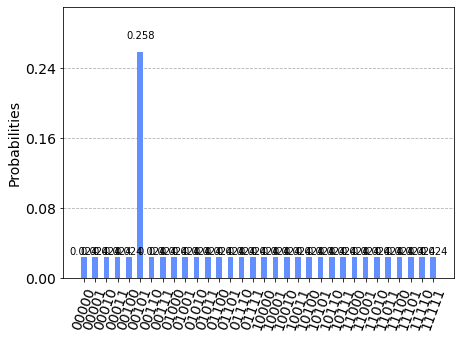

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


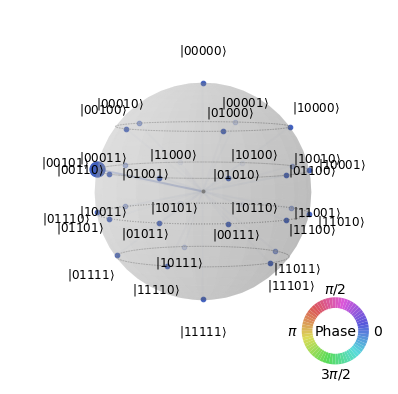

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


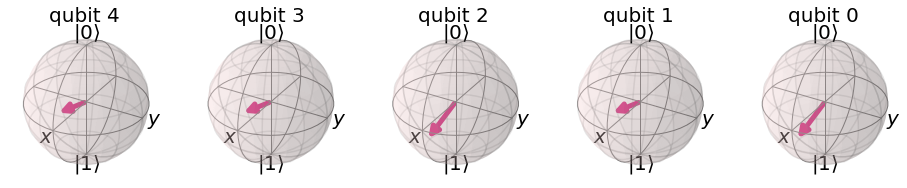

#################################################################################################### REPETITION 2 :


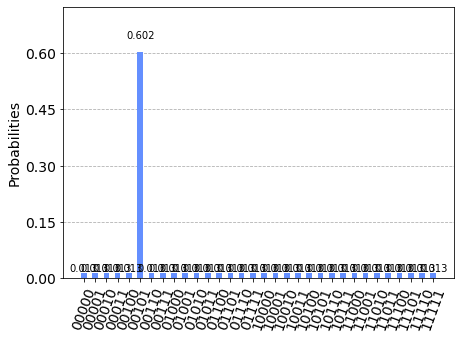

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


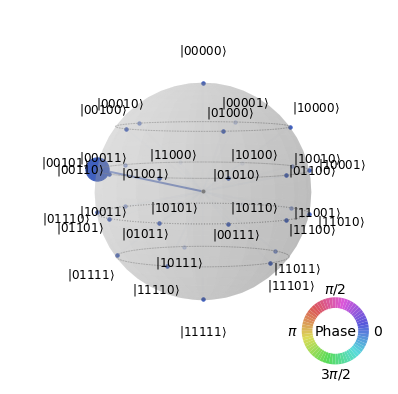

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


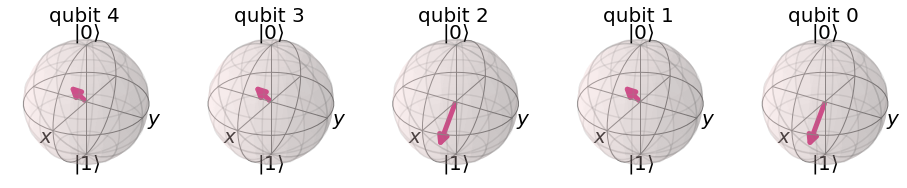

#################################################################################################### REPETITION 3 :


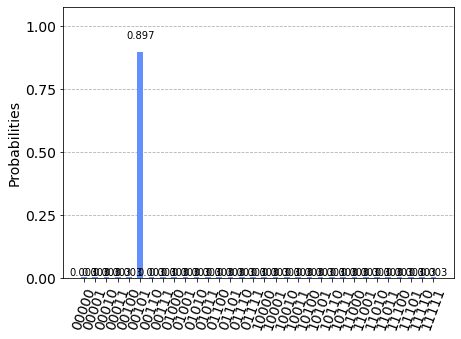

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


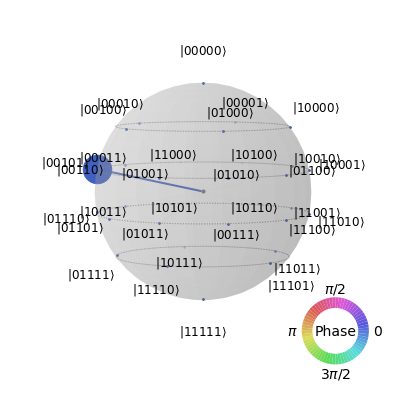

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


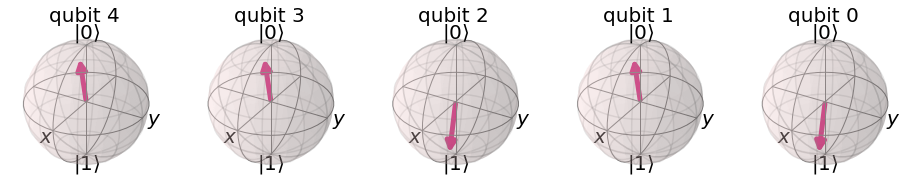

#################################################################################################### REPETITION 4 :


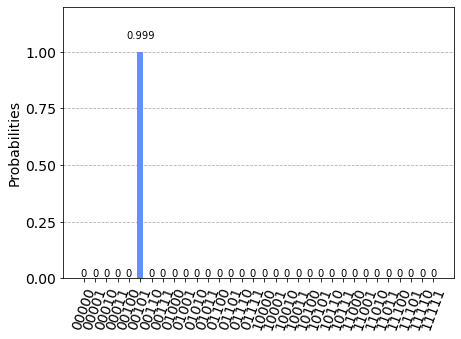

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


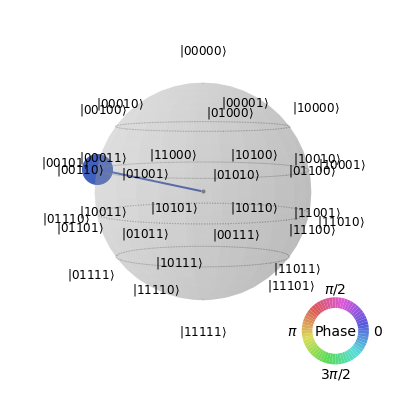

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


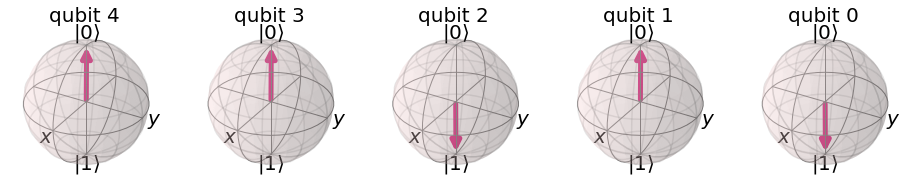

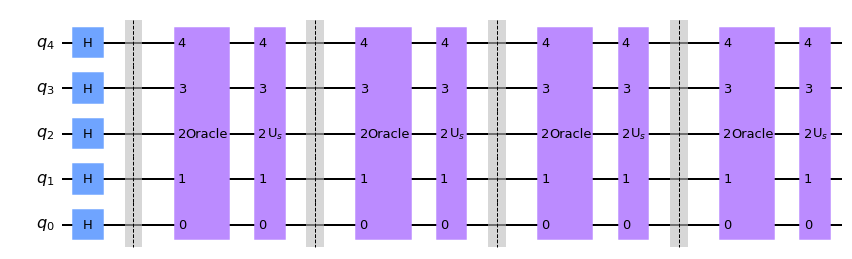

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


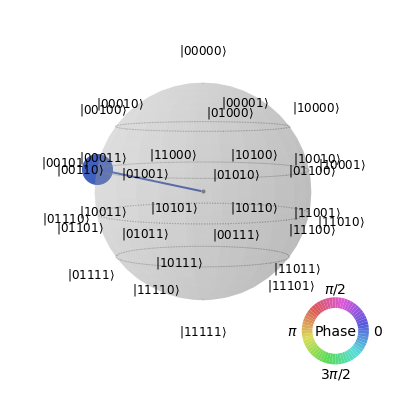

C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


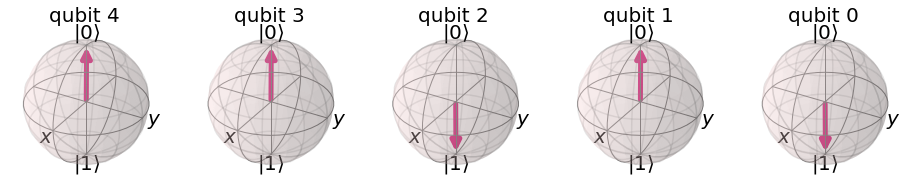

In [10]:
Grover_circuit(5, 5, qspheres=True, qubits=True, histograms=True, circuit=True)
